In [9]:
# A short introduction to using python for astrophysics
# Credit: Robert Lindner (UW-Madison, May 2014)
#
#
# Boot up python and load the Numpy and Matplotlib modules
import numpy as np
import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as pl
%matplotlib inline

# The basic structure of the Numpy module is the Numpy Array.
# Numpy arrays were invented to mimic the functionality of
# MATLAB arrays, and also IDL arrays.

empty = np.array([]) # Empty numpy array
x = np.arange(5) # [0,1...,4]
zeros = np.zeros(5) # Array of five zeros 
noise = np.random.randn(5) # Array of five Gaussian random numbers

print 'empty = ', empty
print 'x = ', x
print 'zeros = ', zeros
print 'noise = ', np.round(noise,2)

empty =  []
x =  [0 1 2 3 4]
zeros =  [ 0.  0.  0.  0.  0.]
noise =  [ 1.46 -0.94 -2.1  -1.44 -0.26]


In [10]:
# By default, arrays add element-by-element, and they have
# powerful indexing and masking functionality
print 'x + x =', x + x
print 'x + noise =', np.round(x + noise, 2)


x + x = [0 2 4 6 8]
x + noise = [ 1.46  0.06 -0.1   1.56  3.74]


In [11]:
# One of the most common tasks is selecting data based
# on boolean conditions
w = x > 3        
x[w] = x[w] + 10 # (Add 20 to all values greater than 2)
print 'w = ', w
print 'x = ', x
print 'x[w] = ', x[w]



w =  [False False False False  True]
x =  [ 0  1  2  3 14]
x[w] =  [14]


In [12]:
## Python does not use brackets, braces, or parentheses, 
# or even "end" statements in it control flows.
# Everything is controled using indentation.  You are
# free to pick your own level of indendation, but always 
# use 4 spaces.
#
# For example, 
# Suppose we want to iterate through a 2D array and check 
# the value of each element, the code looks like this:

noise = np.random.randn(100,100) # 2D image of Gaussian noise
detections = 0
print np.sum(noise > 4)
for i in range(noise.shape[0]):
    for j in range(noise.shape[1]):
        if noise[i,j] > 4.:
            detections += 1
            print '4 Sigma Detection! ', noise[i,j]
if detections==0:
    print 'No detections, need more observing time.'
 

0
No detections, need more observing time.


In [6]:
# Ok, now let's bring some realistic data into a numpy 
# array. The fits file "galaxy_red.fit" is a red filter
# image of a galaxy.

# Fits files are packaged up into Header Data Units (HDUs)
# And each HDU has an associated data object (numpy array) 
# and header object.  Lots to read about here:
# http://docs.astropy.org/en/stable/io/fits/index.html

import astropy.io.fits as fits

# Read in the image file
file_red = 'galaxy_red.fit'
hdu = fits.open(file_red)
image, header = hdu[0].data, hdu[0].header

print hdu.info()
print " "
print 'image.shape = ', image.shape
print 'Mean Flux = ', image[image==image].mean()
print 'Noise Level = ', image[image==image].std()

Filename: galaxy_red.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      73   (2048, 1489)   uint16   
None
 
image.shape =  (1489, 2048)
Mean Flux =  1218.98969264
Noise Level =  159.559558611


In [12]:
# Let's try reading in the images for all three filters

file_red = 'galaxy_red.fit'
file_blue = 'galaxy_blue.fit'
file_green = 'galaxy_green.fit'

red_data = fits.getdata(file_red)
blue_data = fits.getdata(file_blue)
green_data = fits.getdata(file_green)

print "Done reading in files."


Done reading in files.


<type 'numpy.ndarray'>
(1489, 2048)
('Min:', 1171)
('Max:', 55224)
('Mean:', 1218.9896926418737)
('Stdev:', 159.55955861084561)


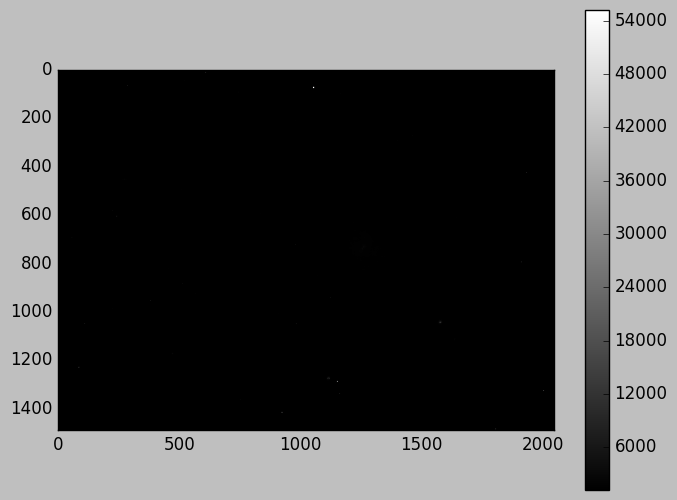

In [13]:
print(type(red_data))
print(red_data.shape)

pl.clf()
pl.imshow(red_data, cmap='gray')
pl.colorbar()

print('Min:', np.min(red_data))
print('Max:', np.max(red_data))
print('Mean:', np.mean(red_data))
print('Stdev:', np.std(red_data))
# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

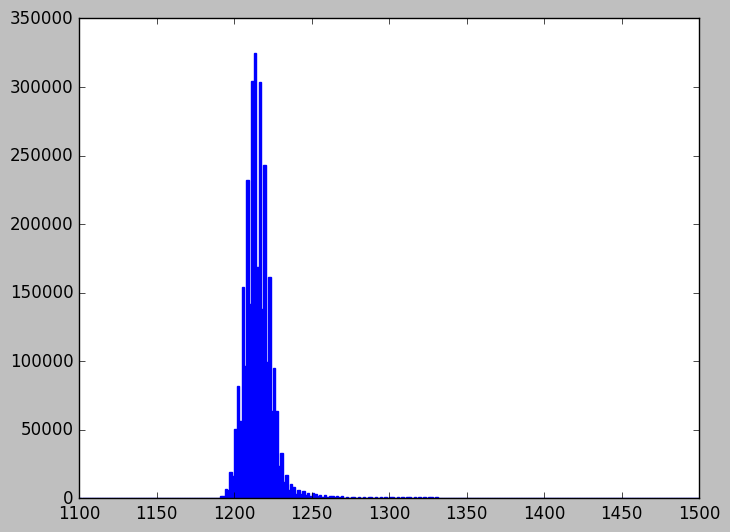

In [19]:
# Sometimes you want to enhance the contrast in your image, 
# or expand the contrast in a particular region while 
# sacrificing the detail in colors that don’t vary much, 
# or don’t matter. A good tool to find interesting regions 
# is the histogram. To create a histogram of our image data, 
# we use the hist() function.

pl.clf()
#pl.hist(red_data.ravel(), bins=256, range=(np.min(red_data), np.max(red_data)), fc='b', ec='b')
pl.hist(red_data.ravel(), bins=256, range=(1100,1500), fc='b', ec='b')
pl.show()

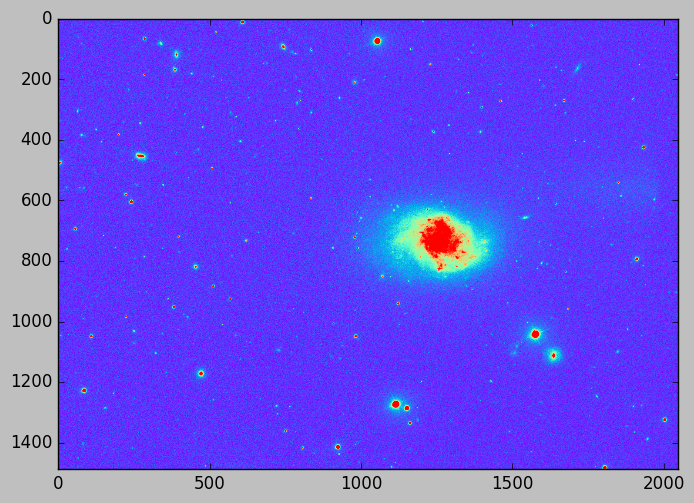

In [23]:
# crop the flux range to show more contrast

imgplot = pl.imshow(red_data, clim=(1200., 1400.), cmap='rainbow')

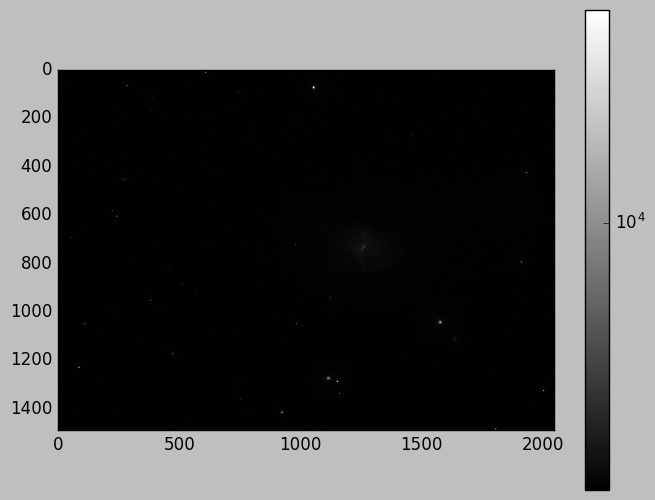

In [24]:
# plot flux with logarithmic scaling
from matplotlib.colors import LogNorm
import img_scale

pl.clf()
pl.imshow(red_data, cmap='gray', norm = LogNorm())
pl.colorbar()


img_scale : sqrt
img_scale : sqrt
img_scale : sqrt


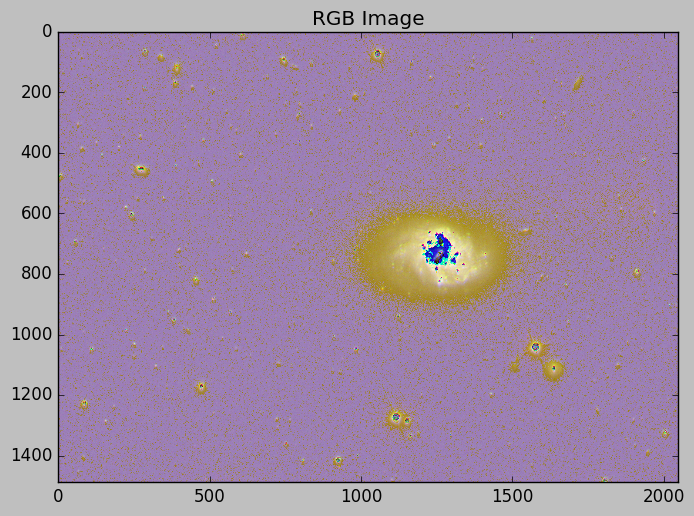

In [25]:
# Make an RBG image using the three filter images

# Set up an empty matrix for the stacked image
img = np.zeros((red_data.shape[0], red_data.shape[1], 3), dtype=float)

# Add each of the filter images
img[:,:,0] = img_scale.sqrt(red_data, scale_min=1100, scale_max=1400)
img[:,:,1] = img_scale.sqrt(green_data, scale_min=1100, scale_max=1400)
img[:,:,2] = img_scale.sqrt(blue_data, scale_min=1100, scale_max=1400)

pl.clf()
pl.imshow(img, aspect='equal')
pl.title('RGB Image')
pl.savefig('my_rgb_image.png')

In [58]:
# Can also be generated from the command line:   
# ds9 -rgb -red galaxy_red.fit -green galaxy_green.fit -blue galaxy_blue.fit &

SyntaxError: invalid syntax (<ipython-input-58-5d5104d3a9c5>, line 1)

In [7]:
# import some necessary libraries for image analysis
import pyraf
from pyraf import iraf
from iraf import stsdas, restore, noao, obsutil, analysis

## if you get an error when running this, open a new terminal window in the same directory and type: mkiraf